# UFC Supervised Machine Learning - Linear Regression

## List of Contents:
## 01. Importing Libraries
## 02. Importing Data
## 03. Cleaning Data
## 04. Exploring Variables
## 05. Hypotheses
## 06. Preparing Data
## 07. Performing Linear Regression Analysis
## 08. Final Thoughts

## --

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Option to display charts without call
%matplotlib inline

In [8]:
#To view all columns of dataset at once
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

## 02. Importing Data

In [4]:
#Defining path for data import
path = r'C:\Users\Mosspants\Desktop\CareerFoundry\A6_Advanced Analytics & Dashboard Design\UFC_Project'

In [5]:
#Importing data
df_ufc = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'ufc_opp_avgs_eva.csv'), index_col=False)

In [6]:
#Checking import
df_ufc.head()

,Unnamed: 0,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year,Age_group
0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135,31,27,20,3,2021,Middle
1,1,Trevin Giles,Roman Dolidze,Herb Dean,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.

## 03. Cleaning Data

### Checking for missing values:

In [9]:
#Checking for missing values
df_ufc.isnull().sum()

Unnamed: 0                         0
R_fighter                          0
B_fighter                          0
Referee                           31
location                           0
Winner                             0
title_bout                         0
weight_class                       0
B_avg_KD                        1318
B_avg_opp_KD                    1318
B_avg_SIG_STR_pct               1318
B_avg_opp_SIG_STR_pct           1318
B_avg_TD_pct                    1318
B_avg_opp_TD_pct                1318
B_avg_SUB_ATT                   1318
B_avg_opp_SUB_ATT               1318
B_avg_REV                       1318
B_avg_opp_REV                   1318
B_avg_SIG_STR_att               1318
B_avg_SIG_STR_landed            1318
B_avg_opp_SIG_STR_att           1318
B_avg_opp_SIG_STR_landed        1318
B_avg_TOTAL_STR_att             1318
B_avg_TOTAL_STR_landed          1318
B_avg_opp_TOTAL_STR_att         1318
B_avg_opp_TOTAL_STR_landed      1318
B_avg_TD_att                    1318
B

### The missing values in data are because if it is a fighter's first match, they wouldn't have an average amount of knockouts or strikes. I will leave these in for now. I will also leave the missing Referee values in as well, because we will not be using them for the regression.

### Checking for duplicates:

In [10]:
#Checking for duplicates
dups = df_ufc.duplicated()

In [11]:
dups.shape

(5809,)

### There are no duplicates.

### Removing columns:

In [12]:
#Removing 'Unnamed: 0' column, which may be the index duplicated when importing the .csv
df_ufc.drop(columns = ['Unnamed: 0'])

,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year,Age_group
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135,31,27,20,3,2021,Middle
1,Trevin Giles,Roman Dolidze,Herb Dean,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5

### Check for extreme values:

### Because of the large amount of columns, I will only check for extreme values in the variables I plan to use for the regression analysis.

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_15032\1022972820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  b_wins = sns.distplot(df_ufc['B_wins'], bins=25)
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


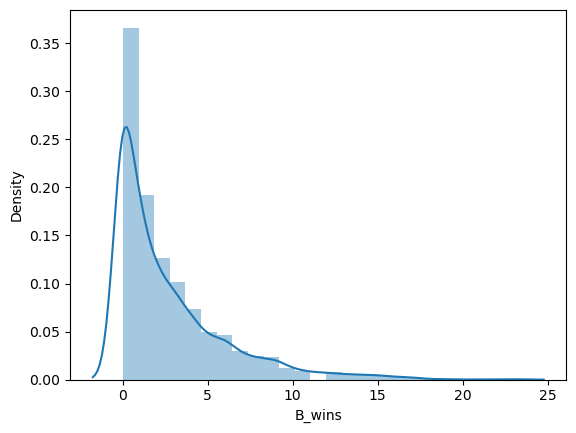

In [13]:
#Blue Wins
b_wins = sns.distplot(df_ufc['B_wins'], bins=25)

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_15032\3416191473.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  r_wins = sns.distplot(df_ufc['R_wins'], bins=25)
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


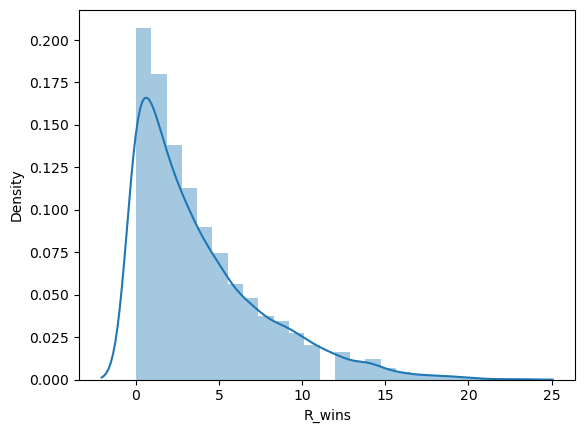

In [14]:
#Red Wins
r_wins = sns.distplot(df_ufc['R_wins'], bins=25)

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_15032\1364257081.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  b_rounds = sns.distplot(df_ufc['B_total_rounds_fought'], bins=25)
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


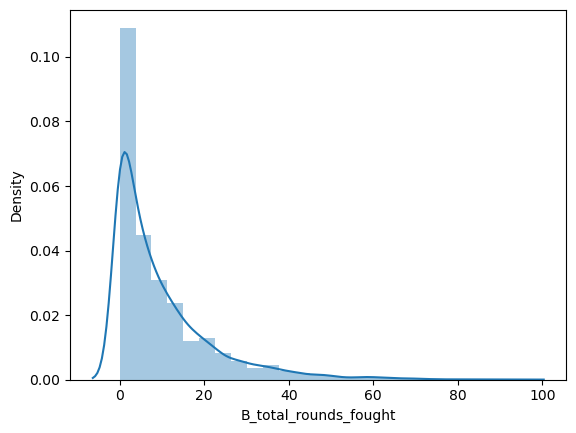

In [19]:
#Blue total rounds fought
b_rounds = sns.distplot(df_ufc['B_total_rounds_fought'], bins=25)

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_15032\475244236.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  r_rounds = sns.distplot(df_ufc['R_total_rounds_fought'], bins=25)
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


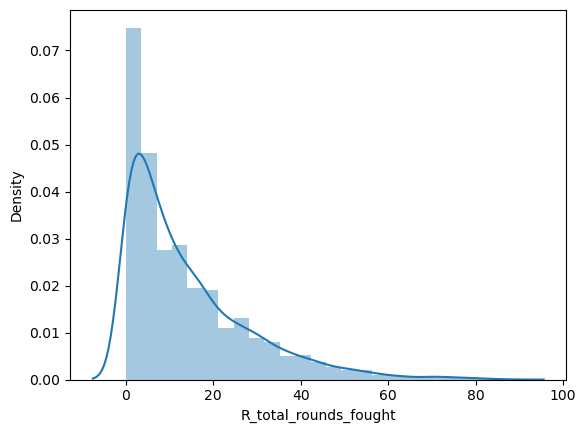

In [20]:
#Red total rounds fought
r_rounds = sns.distplot(df_ufc['R_total_rounds_fought'], bins=25)

### These previous variables were chosen based around the hypothesis that if you have more rounds, you will have more wins. Below I will also look at the average significant strike attempts and opponent strike attempts. These are correlated at 0.82 for Blue and 0.80 for Red. It may be that if a fighter is aggressive, their opponent may respond aggresively as well.

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_15032\3726846133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  b_sigstr = sns.distplot(df_ufc['B_avg_SIG_STR_att'], bins=25)
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


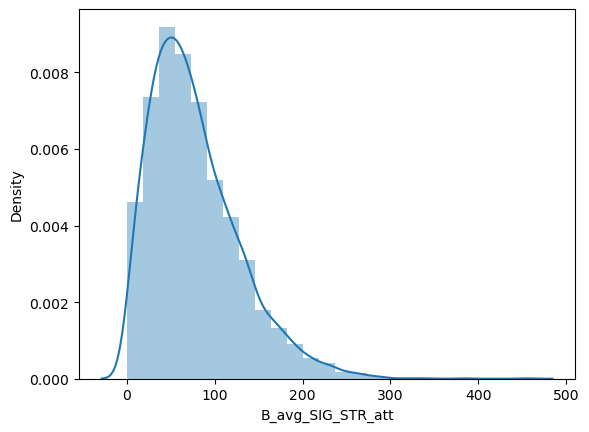

In [22]:
#Blue average significant strikes attempted
b_sigstr = sns.distplot(df_ufc['B_avg_SIG_STR_att'], bins=25)

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_15032\461333984.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  b_opp_sigstr = sns.distplot(df_ufc['B_avg_opp_SIG_STR_att'], bins=25)
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


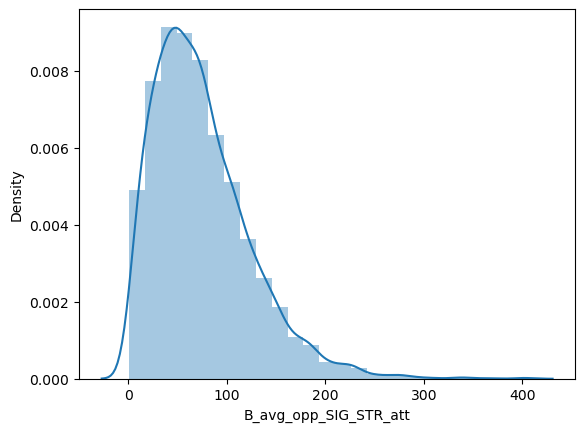

In [21]:
#Blue average significant strikes attempted by opponent
b_opp_sigstr = sns.distplot(df_ufc['B_avg_opp_SIG_STR_att'], bins=25)

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_15032\3619256727.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  r_sigstr = sns.distplot(df_ufc['R_avg_SIG_STR_att'], bins=25)
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


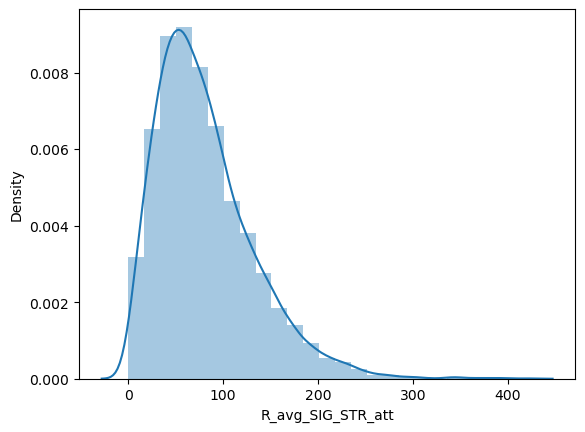

In [23]:
#Red average significant strikes attempted
r_sigstr = sns.distplot(df_ufc['R_avg_SIG_STR_att'], bins=25)

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_15032\1101820228.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  r_opp_sigstr = sns.distplot(df_ufc['R_avg_opp_SIG_STR_att'], bins=25)
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


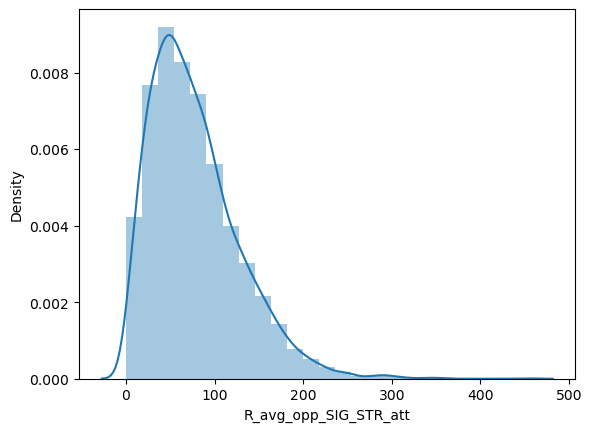

In [24]:
#Red average significant strikes attempted by opponent
r_opp_sigstr = sns.distplot(df_ufc['R_avg_opp_SIG_STR_att'], bins=25)

### I will not be eliminating any extreme values. It is hard to say what is an outlier when the data is based on physical performance. 
### There is also not a set amount of rounds fought during the year or a fighter's career, so we cannot say if having a high number of rounds fought is an outlier.

## 04. Exploring Variables

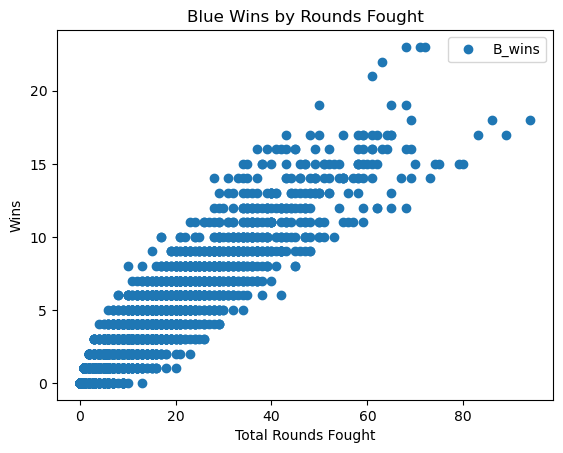

In [26]:
#Scatterplot of Blue wins and Blue number of rounds fought
df_ufc.plot(x = 'B_total_rounds_fought', y='B_wins',style='o')
plt.title('Blue Wins by Rounds Fought')  
plt.xlabel('Total Rounds Fought')  
plt.ylabel('Wins')  
plt.show()

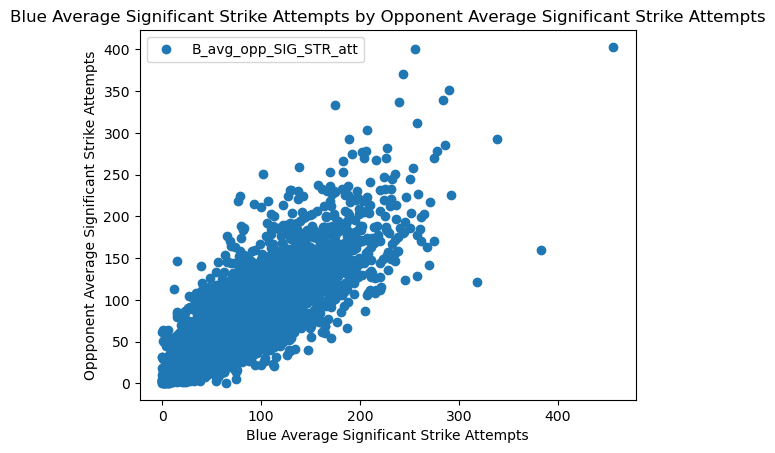

In [31]:
#Scatterplot of Blue significant strikes attempted and opponent significant strikes attempted
df_ufc.plot(x = 'B_avg_SIG_STR_att', y='B_avg_opp_SIG_STR_att',style='o')
plt.title('Blue Average Significant Strike Attempts by Opponent Average Significant Strike Attempts')  
plt.xlabel('Blue Average Significant Strike Attempts')  
plt.ylabel('Oppponent Average Significant Strike Attempts')  
plt.show()

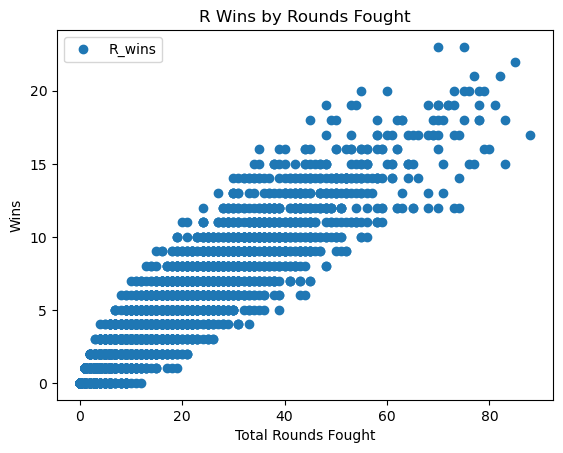

In [33]:
#Scatterplot of Red wins and Red number of rounds fought
df_ufc.plot(x = 'R_total_rounds_fought', y='R_wins',style='o')
plt.title('R Wins by Rounds Fought')  
plt.xlabel('Total Rounds Fought')  
plt.ylabel('Wins')  
plt.show()

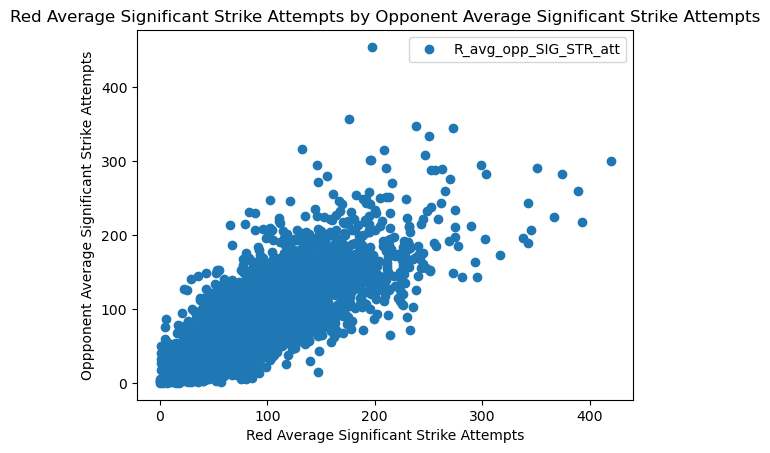

In [32]:
#Scatterplot of Red significant strikes attempted and opponent significant strikes attempted
df_ufc.plot(x = 'R_avg_SIG_STR_att', y='R_avg_opp_SIG_STR_att',style='o')
plt.title('Red Average Significant Strike Attempts by Opponent Average Significant Strike Attempts')  
plt.xlabel('Red Average Significant Strike Attempts')  
plt.ylabel('Oppponent Average Significant Strike Attempts')  
plt.show()

## 05. Hypotheses

### 1: If a fighter is in more rounds, they will have more total wins.
### 2: If a fighter makes more significant strike attempts, their opponent will also make more significant strike attempts.

## 06. Preparing Data

### Reshaping the variables into arrays:

In [34]:
#Blue wins and total rounds fought
X_bwin = df_ufc['B_total_rounds_fought'].values.reshape(-1,1)
y_bwin = df_ufc['B_wins'].values.reshape(-1,1)

In [39]:
#Red wins and total rounds fought
X_rwin = df_ufc['R_total_rounds_fought'].values.reshape(-1,1)
y_rwin = df_ufc['R_wins'].values.reshape(-1,1)

In [36]:
#Blue average significant strike attempts and opponent average significant strike attempts
X_bstrike = df_ufc['B_avg_SIG_STR_att'].values.reshape(-1,1)
y_bstrike = df_ufc['B_avg_opp_SIG_STR_att'].values.reshape(-1,1)

In [37]:
#Red average significant strike attempts and opponent average significant strike attempts
X_rstrike = df_ufc['R_avg_SIG_STR_att'].values.reshape(-1,1)
y_rstrike = df_ufc['R_avg_opp_SIG_STR_att'].values.reshape(-1,1)

### Splitting data into training and test sets:

In [38]:
#Blue wins and total rounds fought
X_bwin_train, X_bwin_test, y_bwin_train, y_bwin_test = train_test_split(X_bwin, y_bwin, test_size=0.3, random_state=0)

In [40]:
#Red wins and total rounds fought
X_rwin_train, X_rwin_test, y_rwin_train, y_rwin_test = train_test_split(X_rwin, y_rwin, test_size=0.3, random_state=0)

In [41]:
#Blue average significant strike attempts and opponent average significant strike attempts
X_bstrike_train, X_bstrike_test, y_bstrike_train, y_bstrike_test = train_test_split(X_bstrike, y_bstrike, test_size=0.3, random_state=0)

In [42]:
#Red average significant strike attempts and opponent average significant strike attempts
X_rstrike_train, X_rstrike_test, y_rstrike_train, y_rstrike_test = train_test_split(X_rstrike, y_rstrike, test_size=0.3, random_state=0)

## 07. Performing Linear Regression Analysis

### Blue wins by number of rounds fought:

In [43]:
#Creating a regression object
regression = LinearRegression()

In [44]:
#Fitting Blue wins training to regression object
regression.fit(X_bwin_train, y_bwin_train)

LinearRegression()

In [45]:
#Predicting the values of y using X
y_bwin_predicted = regression.predict(X_bwin_test)

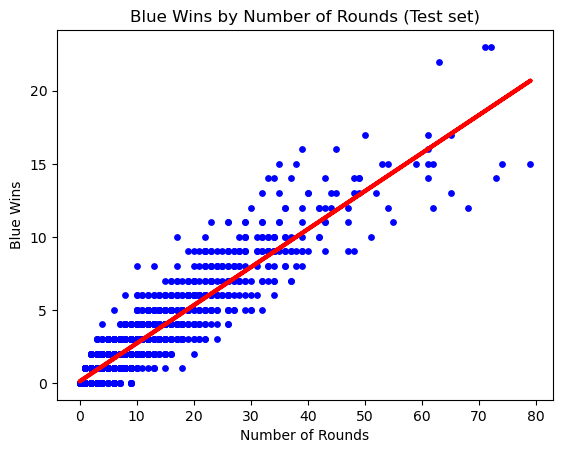

In [46]:
#Creating plot of Blue wins regression line from test
plot_bwin_test = plt
plot_bwin_test.scatter(X_bwin_test, y_bwin_test, color='blue', s = 15)
plot_bwin_test.plot(X_bwin_test, y_bwin_predicted, color='red', linewidth =3)
plot_bwin_test.title('Blue Wins by Number of Rounds (Test set)')
plot_bwin_test.xlabel('Number of Rounds')
plot_bwin_test.ylabel('Blue Wins')
plot_bwin_test.show()

### This line runs through the cluster, but many points are far away from the line. This does make sense, as the correlation between wins and rounds is not the strongest.

In [53]:
#Creating objects for summary statistics
bwin_rmse = mean_squared_error(y_bwin_test, y_bwin_predicted)
bwin_r2 = r2_score(y_bwin_test, y_bwin_predicted)

In [54]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', bwin_rmse)
print('R2 score: ', bwin_r2)

Slope: [[0.26060546]]
Mean squared error:  1.4060954739599023
R2 score:  0.8728077689337727


In [55]:
#Creating a dataframe comparing the actual and predicted values of y_bwin
bwin_data = pd.DataFrame({'Actual': y_bwin_test.flatten(), 'Predicted': y_bwin_predicted.flatten()})
bwin_data.head(30)

,Actual,Predicted
0,1,1.665958
1,1,1.144747
2,15,13.914415
3,1,2.447774
4,1,1.144747
5,0,0.102325
6,0,0.884141
7,5,3.750802
8,2,1.405352
9,3,4.532618


### The predictive values are varied, with some being close and some being different to the actual values. The slope is positive, indicating that as number of rounds increase wins also increase. It is, however, not very steep at 0.26. The mean squared error is smaller than I would've expected, but we are also dealing with smaller numbers for wins and rounds. The R2 score is also higher than I expected, being fairly close to 1 at 0.87.

### Red wins by number of rounds fought:

In [56]:
#Creating a regression object
rwin_regression = LinearRegression()

In [57]:
#Fitting Red wins training to regression object
rwin_regression.fit(X_rwin_train, y_rwin_train)

LinearRegression()

In [58]:
#Predicting the values of y using X
y_rwin_predicted = rwin_regression.predict(X_rwin_test)

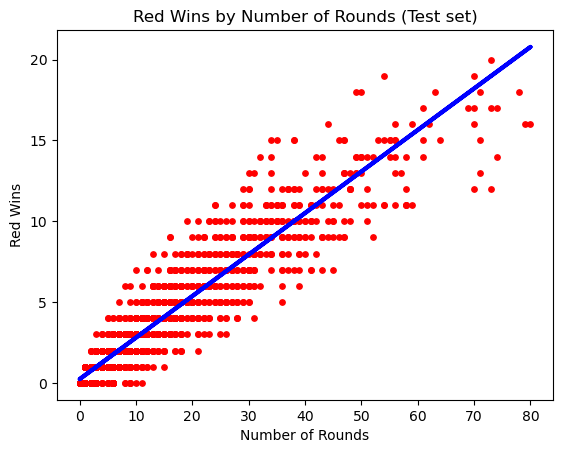

In [59]:
#Creating plot of Red wins regression line from test
plot_rwin_test = plt
plot_rwin_test.scatter(X_rwin_test, y_rwin_test, color='red', s = 15)
plot_rwin_test.plot(X_rwin_test, y_rwin_predicted, color='blue', linewidth =3)
plot_rwin_test.title('Red Wins by Number of Rounds (Test set)')
plot_rwin_test.xlabel('Number of Rounds')
plot_rwin_test.ylabel('Red Wins')
plot_rwin_test.show()

### This regression line also runs through the cluster, but many points are far away from the line. Red wins have a similar spread to Blue wins.

In [60]:
#Creating objects for summary statistics
rwin_rmse = mean_squared_error(y_rwin_test, y_rwin_predicted)
rwin_r2 = r2_score(y_rwin_test, y_rwin_predicted)

In [61]:
print('Slope:' , rwin_regression.coef_)
print('Mean squared error: ', rwin_rmse)
print('R2 score: ', rwin_r2)

Slope: [[0.25692922]]
Mean squared error:  1.9648686106807425
R2 score:  0.8680173997199545


In [62]:
#Creating a dataframe comparing the actual and predicted values of y_bwin
rwin_data = pd.DataFrame({'Actual': y_rwin_test.flatten(), 'Predicted': y_rwin_predicted.flatten()})
rwin_data.head(30)

,Actual,Predicted
0,1,1.001970
1,0,1.001970
2,13,10.508351
3,3,1.772758
4,0,0.488112
5,1,1.258899
6,6,5.883625
7,0,1.772758
8,0,0.231182
9,3,2.286616


### The result of the linear regression for Red wins are similar to the Blue wins. The mean squared error is higher with Red wins than Blue wins, indicating that the regression line is further away from Red data points than Blue's regression line was for its own data points.

### Blue average significant strike attempts by opponent average significant strike attempts:

In [63]:
#Creating a regression object
bstrike_regression = LinearRegression()

In [64]:
#Fitting Blue wins training to regression object
bstrike_regression.fit(X_bstrike_train, y_bstrike_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### I received an error that the linear regression doesn't accept missing values. I will remove them for this and the red average significant strike regression.

### Removing NaN values:

In [170]:
#Removing NaN values
df_ufc.dropna(inplace = True)

In [171]:
#Checking values in new dataframe
df_ufc.isnull().sum()

Unnamed: 0                      0
R_fighter                       0
B_fighter                       0
Referee                         0
location                        0
Winner                          0
title_bout                      0
weight_class                    0
B_avg_KD                        0
B_avg_opp_KD                    0
B_avg_SIG_STR_pct               0
B_avg_opp_SIG_STR_pct           0
B_avg_TD_pct                    0
B_avg_opp_TD_pct                0
B_avg_SUB_ATT                   0
B_avg_opp_SUB_ATT               0
B_avg_REV                       0
B_avg_opp_REV                   0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_opp_SIG_STR_att           0
B_avg_opp_SIG_STR_landed        0
B_avg_TOTAL_STR_att             0
B_avg_TOTAL_STR_landed          0
B_avg_opp_TOTAL_STR_att         0
B_avg_opp_TOTAL_STR_landed      0
B_avg_TD_att                    0
B_avg_TD_landed                 0
B_avg_opp_TD_att                0
B_avg_opp_TD_l

In [173]:
df_ufc.shape

(4218, 148)

In [174]:
df_ufc.head()

,Unnamed: 0,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year,Age_group
0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.0000,0.000000,0.00,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.000000,6.500000,39.500000,11.000000,63.000000,27.500000,7.500000,7.000000,12.00000,9.000000,3.000000,2.000000,9.000000,8.500000,35.000000,12.500000,43.500000,17.500000,10.50000,4.500000,4.000000,3.000000,4.50000,3.000000,36.500000,24.500000,34.000000,277.500000,531.50000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135,1.00000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135,31,27,20,3,2021,Middle
1,1,Trevin Giles,Roman Dolidze,Herb Dean,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.000,0.660000,0.305000,0.300000,0.500000,1.500000,0.0000,0.000000,0.00,65.500000,35.000000,50.000000,16.500000,113.50000

### Re-creating arrays:

In [175]:
#Blue average significant strike attempts array
X_bstr = df_ufc['B_avg_SIG_STR_att'].values.reshape(-1,1)
y_bstr = df_ufc['B_avg_opp_SIG_STR_att'].values.reshape(-1,1)

In [176]:
#Red average significant strike attempts and array
X_rstr = df_ufc['R_avg_SIG_STR_att'].values.reshape(-1,1)
y_rstr = df_ufc['R_avg_opp_SIG_STR_att'].values.reshape(-1,1)

### Re-creating training and test sets:

In [178]:
#Blue average significant strike attempts training and test sets
X_bstr_train, X_bstr_test, y_bstr_train, y_bstr_test = train_test_split(X_bstr, y_bstr, test_size=0.3, random_state=0)

In [179]:
#Red average significant strike attempts training and test sets
X_rstr_train, X_rstr_test, y_rstr_train, y_rstr_test = train_test_split(X_rstr, y_rstr, test_size=0.3, random_state=0)

### Re-creating Blue average significant strike attempts by opponent average significant strike attempts regression:

In [180]:
#Creating a regression object
bstr_regression = LinearRegression()

In [181]:
#Fitting Blue strikes training to regression object
bstr_regression.fit(X_bstr_train, y_bstr_train)

LinearRegression()

In [182]:
#Predicting the values of y using X
y_bstr_predicted = bstr_regression.predict(X_bstr_test)

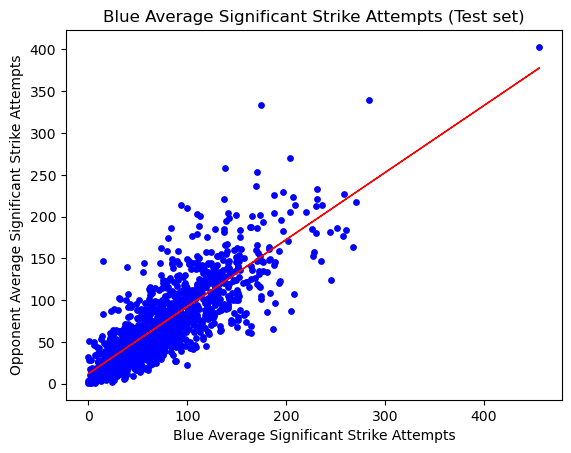

In [183]:
#Creating plot of Blue strikes regression line from test
plot_bstr_test = plt
plot_bstr_test.scatter(X_bstr_test, y_bstr_test, color='blue', s = 15)
plot_bstr_test.plot(X_bstr_test, y_bstr_predicted, color='red', linewidth =1)
plot_bstr_test.title('Blue Average Significant Strike Attempts (Test set)')
plot_bstr_test.xlabel('Blue Average Significant Strike Attempts')
plot_bstr_test.ylabel('Opponent Average Significant Strike Attempts')
plot_bstr_test.show()

In [184]:
#Creating objects for summary statistics
bstr_rmse = mean_squared_error(y_bstr_test, y_bstr_predicted)
bstr_r2 = r2_score(y_bstr_test, y_bstr_predicted)

In [185]:
print('Slope:' , bstr_regression.coef_)
print('Mean squared error: ', bstr_rmse)
print('R2 score: ', bstr_r2)

Slope: [[0.80181462]]
Mean squared error:  789.3656445743219
R2 score:  0.6626845083964031


In [186]:
#Creating a dataframe comparing the actual and predicted values of y_bwin
bstr_data = pd.DataFrame({'Actual': y_bstr_test.flatten(), 'Predicted': y_bstr_predicted.flatten()})
bstr_data.head(30)

,Actual,Predicted
0,88.500000,51.885357
1,83.437500,111.451414
2,15.750000,24.623660
3,84.000000,73.935259
4,43.000000,28.231826
5,35.500000,46.210013
6,37.500000,61.908040
7,11.500000,14.600978
8,69.693207,62.512301
9,87.750000,73.684692


### The slope is positive, so as the Blue fighter makes more significant strikes the opponent also makes more significant strikes. Our mean squared error is very large here though, at 789.37. There is one value that could be an outlier, as it shows an average of 400 strike attempts but the mean squared error is still almost double the max value. The R2 score is 0.66, not that high to indicate this being a good fit for the data. 

### Red average significant strike attempts by opponent average significant strike attempts regression:

In [187]:
#Creating a regression object
rstr_regression = LinearRegression()

In [188]:
#Fitting Red strikes training to regression object
rstr_regression.fit(X_rstr_train, y_rstr_train)

LinearRegression()

In [189]:
#Predicting the values of y using X
y_rstr_predicted = rstr_regression.predict(X_rstr_test)

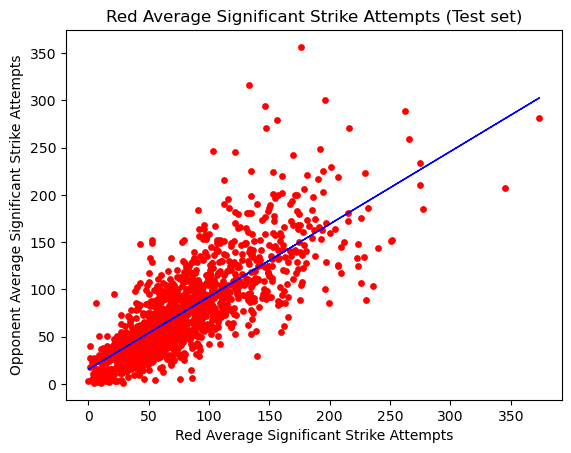

In [190]:
#Creating plot of red strikes regression line from test
plot_rstr_test = plt
plot_rstr_test.scatter(X_rstr_test, y_rstr_test, color='red', s = 15)
plot_rstr_test.plot(X_rstr_test, y_rstr_predicted, color='blue', linewidth =1)
plot_rstr_test.title('Red Average Significant Strike Attempts (Test set)')
plot_rstr_test.xlabel('Red Average Significant Strike Attempts')
plot_rstr_test.ylabel('Opponent Average Significant Strike Attempts')
plot_rstr_test.show()

In [191]:
#Creating objects for summary statistics
rstr_test_rmse = mean_squared_error(y_rstr_test, y_rstr_predicted)
rstr_test_r2 = r2_score(y_rstr_test, y_bstr_predicted)

In [192]:
print('Slope:' , rstr_regression.coef_)
print('Mean squared error: ', rstr_test_rmse)
print('R2 score: ', rstr_test_r2)

Slope: [[0.76900902]]
Mean squared error:  992.4820000409286
R2 score:  -0.35189477611310727


In [193]:
#Creating a dataframe comparing the actual and predicted values of y_bwin
rstr_data = pd.DataFrame({'Actual': y_rstr_test.flatten(), 'Predicted': y_rstr_predicted.flatten()})
rstr_data.head(30)

,Actual,Predicted
0,59.695312,60.166773
1,77.343750,90.007928
2,5.609375,50.572184
3,13.500000,29.640720
4,107.328125,81.897286
5,50.992188,98.238728
6,137.573799,101.605395
7,80.875000,57.517297
8,95.505096,89.387285
9,81.750000,67.322162


### The red strikes graph also has a positive slope but an even bigger mean squared error and negative R2 score. This means that the model fits worse than a horizontal line.

## 08. Final Thoughts

### While some of these variables showed a correlation, the only ones that may be used to predict future values are the relationship between wins and total rounds fought. This does make some sense, as the more rounds a person is in, the more chances they have to win. They also are gaining more experience. What is interesting are the actual data points that do not follow this trend. Those with many wins and few rounds may be making good gains in their careers. If anything, the analysis shows that each fighter is very different and humans have the capacity to surprise and go against predictive models.
### As for the strikes, it does not seem like we can make predictions on fighters. If a fighter is aggressive and makes more significant strike attempts, it does not mean that the opponent will do so as well. While these two variables have a strong correlation, it did not turn out that way in the linear regression. I believe there are other factors that would contribute to the amount of significant strikes attempted. Things like reading your opponent, their guard, or technique would probably be a better indicator of why a strike is attempted.
### There may be some bias in the relationship between wins and total rounds fought. This model was run on all fight data, but fighters are usually grouped into weight classes. We also can't judge if a person is fighting against an "equal" opponent in terms of skill level.